In [58]:
#importar librerías y módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from warnings import filterwarnings
filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure

In [59]:
#Cargar datos
df = pd.read_csv("Cleaned-Data.csv")

In [60]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [62]:
df.isna().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [63]:
df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
X = df[['Difficulty-in-Breathing','Fever']].values
y = df['Contact_Yes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
n_neighbors = 5
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy de K-NN clasificador en entrenamiento set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy de K-NN clasificador en test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

KeyboardInterrupt: 

In [ ]:
#la precisión es de 67% en el dataset de entrenamiento y del 67% para el de test.

In [ ]:
#Precisión del modelo
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

## Estadísticas

In [ ]:
plt.figure(figsize=(5,3))
df.groupby('Fever').size().plot(color='blue',kind='bar')
plt.show()

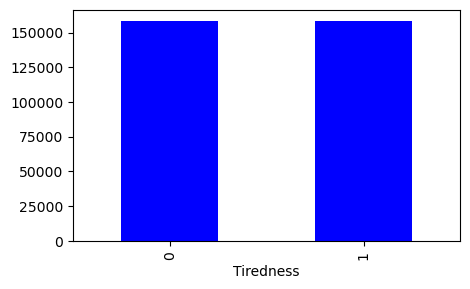

In [29]:
plt.figure(figsize=(5,3))
df.groupby('Tiredness').size().plot(color='blue',kind='bar')
plt.show()

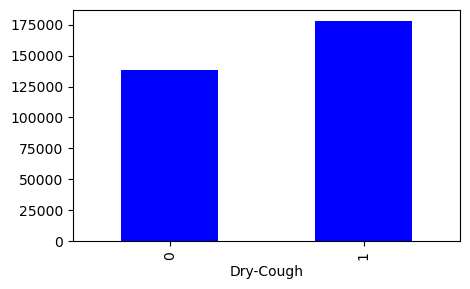

In [30]:
plt.figure(figsize=(5,3))
df.groupby('Dry-Cough').size().plot(color='blue',kind='bar')
plt.show()

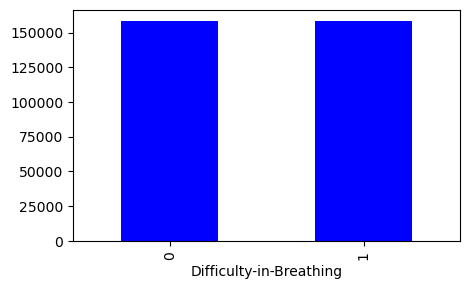

In [33]:
plt.figure(figsize=(5,3))
df.groupby('Difficulty-in-Breathing').size().plot(color='blue',kind='bar')
plt.show()

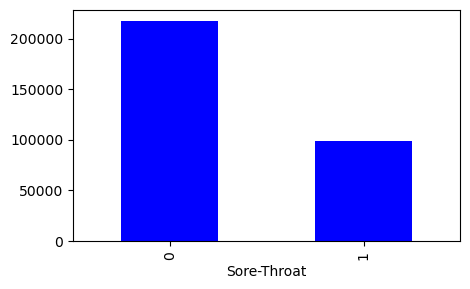

In [34]:
plt.figure(figsize=(5,3))
df.groupby('Sore-Throat').size().plot(color='blue',kind='bar')
plt.show()

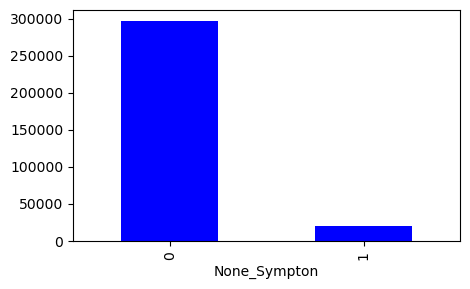

In [28]:
plt.figure(figsize=(5,3))
df.groupby('None_Sympton').size().plot(color='blue',kind='bar')
plt.show()

In [54]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

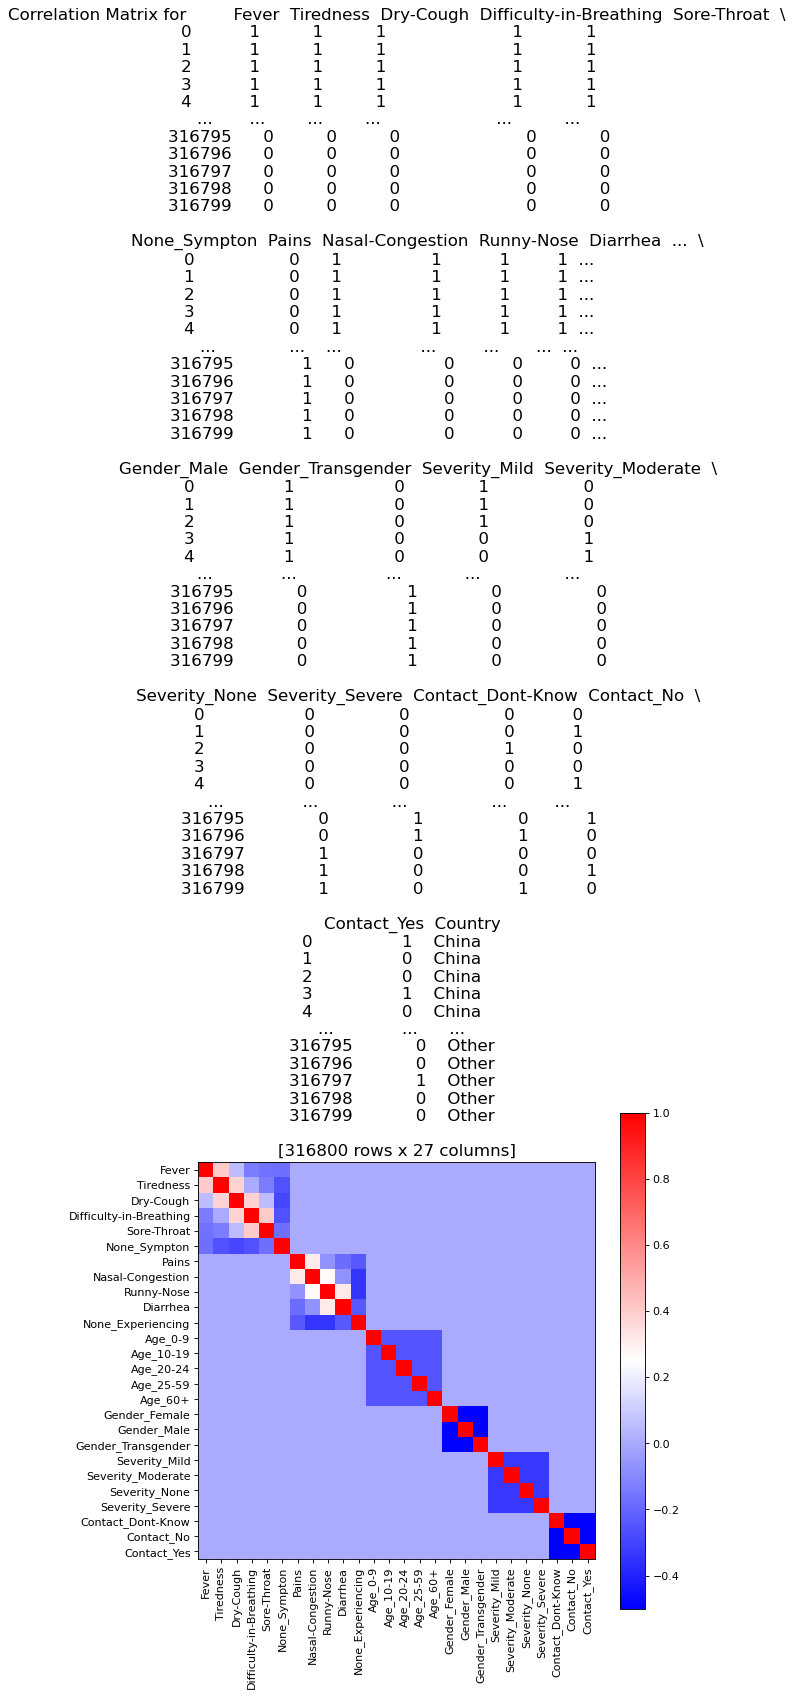

In [55]:
#Matriz de correlación
plotCorrelationMatrix(df, 8)

In [56]:
df.drop(['Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country', 'Severity_Mild', 'Severity_Moderate', 'Severity_None', 'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'None_Sympton'], axis = 1, inplace = True)
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Severity_Severe
0,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,1
316796,0,0,0,0,0,0,0,0,0,1
316797,0,0,0,0,0,0,0,0,0,0
316798,0,0,0,0,0,0,0,0,0,0


array([[<AxesSubplot:title={'center':'Fever'}>,
        <AxesSubplot:title={'center':'Tiredness'}>,
        <AxesSubplot:title={'center':'Dry-Cough'}>],
       [<AxesSubplot:title={'center':'Difficulty-in-Breathing'}>,
        <AxesSubplot:title={'center':'Sore-Throat'}>,
        <AxesSubplot:title={'center':'Pains'}>],
       [<AxesSubplot:title={'center':'Nasal-Congestion'}>,
        <AxesSubplot:title={'center':'Runny-Nose'}>,
        <AxesSubplot:title={'center':'Diarrhea'}>],
       [<AxesSubplot:title={'center':'Severity_Severe'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

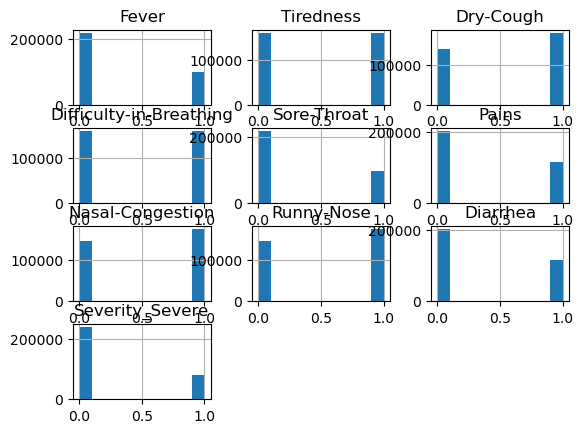

In [57]:
#Histograma sintomas 
df.hist()